<a href="https://colab.research.google.com/github/ali-talebi/task_data_distribution/blob/main/task_kind_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from fitter import Fitter , get_common_distributions , get_distributions 

In [4]:
data = pd.read_excel("/content/drive/MyDrive/task_data_distribiution/4_5798930822899698892.xlsx")

In [5]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,ردیف,زمان بین ورود مشتریان,مدت زمان خدمت گیری (دقیقه)
0,NaN,NaN,NaN,NaN,NaN,1,24,4.0
1,NaN,NaN,NaN,NaN,NaN,2,4,5.4
2,NaN,NaN,NaN,NaN,NaN,3,3,4.2
3,NaN,NaN,NaN,NaN,NaN,4,1,7.0
4,NaN,NaN,NaN,NaN,NaN,5,5,13.4


In [6]:
data.columns 

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'ردیف', 'زمان بین ورود مشتریان', 'مدت زمان خدمت گیری (دقیقه)'],
      dtype='object')

In [7]:
data.rename(columns={"مدت زمان خدمت گیری (دقیقه)":"khedmat" , 'زمان بین ورود مشتریان':"vorod" } , inplace = True )

In [8]:
data.columns 

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'ردیف', 'vorod', 'khedmat'],
      dtype='object')

In [9]:
df = data[["vorod","khedmat"]]

In [10]:
df.head(5)

,vorod,khedmat
0,24,4.0
1,4,5.4
2,3,4.2
3,1,7.0
4,5,13.4


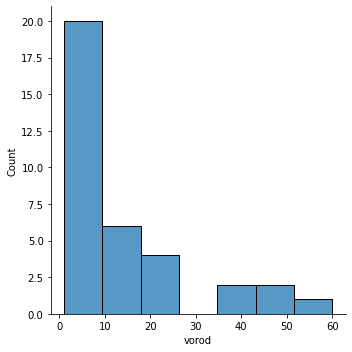

In [11]:
sns.displot(data = df , x="vorod" )

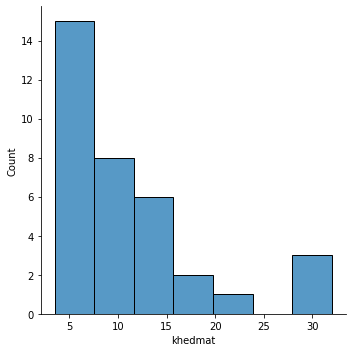

In [12]:
sns.displot(data = df , x="khedmat" )

,sumsquare_error,aic,bic,kl_div
burr,0.055601,1043.274109,-482.669882,inf
gamma,0.069814,1007.021079,-470.983760,inf
beta,0.083136,954.870529,-454.509813,inf
longnorm,inf,inf,inf,inf


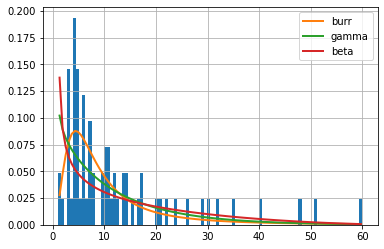

In [22]:
f = Fitter(df.values , 
           distributions = ['gamma' , 'longnorm','beta','burr'])
f.fit()
f.summary()

In [23]:
f.get_best(method="sumsquare_error")

{'burr': {'c': 1.727206524150749,
  'd': 1.7327356203274984,
  'loc': -0.01884170316571014,
  'scale': 5.29646142157679}}

In [24]:
f.get_best(method="aic")

{'beta': {'a': 0.6249881586204462,
  'b': 2.603163380548317,
  'loc': 0.9999999999999999,
  'scale': 66.88013474223479}}

In [25]:
f.get_best(method="bic")

{'burr': {'c': 1.727206524150749,
  'd': 1.7327356203274984,
  'loc': -0.01884170316571014,
  'scale': 5.29646142157679}}

In [27]:
f.fitted_param["beta"]

(0.6249881586204462, 2.603163380548317, 0.9999999999999999, 66.88013474223479)

,sumsquare_error,aic,bic,kl_div
lognorm,0.057595,1027.218829,-484.451571,inf
cauchy,0.066829,1146.495709,-478.290628,inf
expon,0.066849,1009.828463,-478.269500,inf
gamma,0.069814,1007.021079,-470.983760,inf
chi2,0.070028,1013.807036,-470.769254,inf


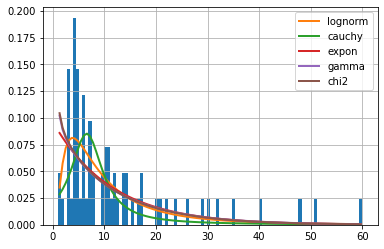

In [28]:
f1 = Fitter(df , distributions=get_common_distributions())
f1.fit()
f1.summary()

In [31]:
f1.get_best(method="sumsquare_error")

{'lognorm': {'loc': 0.1641968850642119,
  's': 0.8983025653696548,
  'scale': 8.167994274647592}}

In [32]:
f1.get_best(method="aic")

{'uniform': {'loc': 1.0, 'scale': 59.0}}

In [33]:
f1.get_best(method="bic")

{'lognorm': {'loc': 0.1641968850642119,
  's': 0.8983025653696548,
  'scale': 8.167994274647592}}

In [34]:
f1.fitted_param["lognorm"]

(0.8983025653696548, 0.1641968850642119, 8.167994274647592)

,sumsquare_error,aic,bic,kl_div
johnsonsu,0.052637,1034.867273,-486.503873,inf
norminvgauss,0.053060,1028.681903,-485.943331,inf
nct,0.055463,1044.018888,-482.843651,inf
invweibull,0.055491,1040.769159,-487.056816,inf
genextreme,0.055491,1040.769958,-487.056677,inf


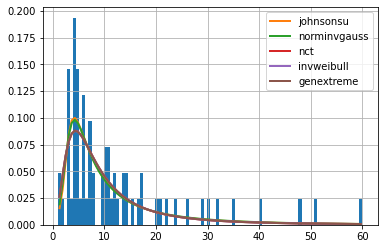

In [29]:
f2 = Fitter(df , distributions=get_distributions())
f2.fit()
f2.summary()

In [35]:
f2.get_best(method="sumsquare_error")

{'johnsonsu': {'a': -1.7060709357453574,
  'b': 0.8737360015736884,
  'loc': 2.300099995847019,
  'scale': 1.5948090833249098}}

In [36]:
f2.get_best(method="aic")

{'vonmises': {'kappa': 1.734832095719002,
  'loc': 8.518577944807085,
  'scale': 8.539828030089555e-32}}

In [37]:
f2.get_best(method="bic")

{'wald': {'loc': -0.33393104772731463, 'scale': 12.813416900946748}}